In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 1. Data Exploration 
First 5 rows of the dataset:
                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045 

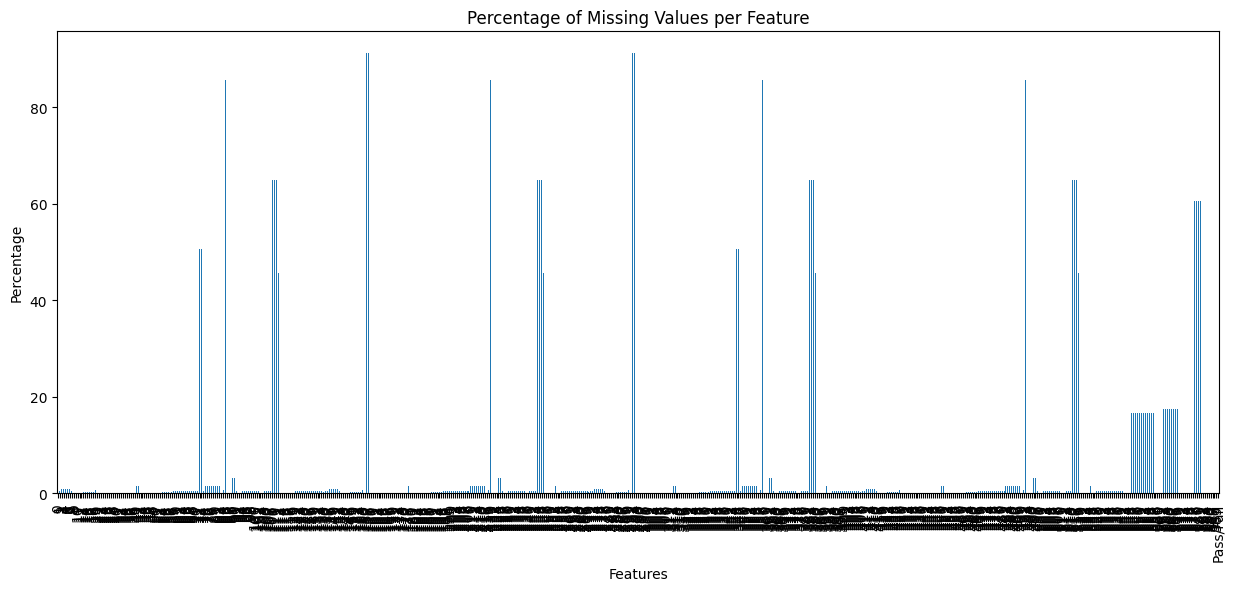


Shape of data after dropping columns with >50% missing values: (1567, 563)
Shape of data after dropping rows with any missing values: (461, 563)

Target variable distribution:
Pass/Fail
-1    422
 1     39
Name: count, dtype: int64

3. Data Analysis & Visualization 


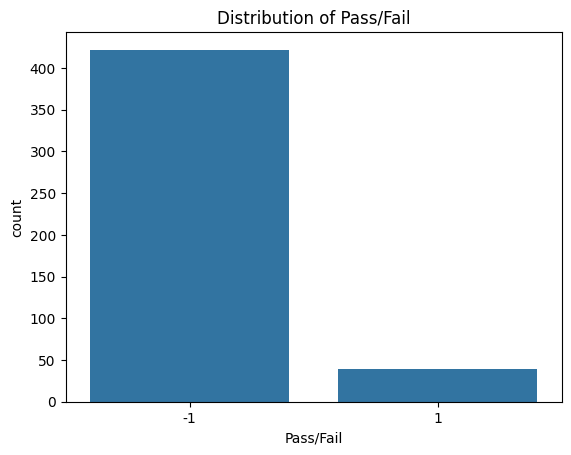


 4. Data Pre-processing 

Target distribution before SMOTE:
Pass/Fail
-1    422
 1     39
Name: count, dtype: int64

Shape of training data after SMOTE: (674, 562)
Target distribution in resampled training data:
Pass/Fail
-1    337
 1    337
Name: count, dtype: int64

 5. Model Training, Testing and Tuning 

--- Training Random Forest Classifier ---
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}

Random Forest - Training Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       337

    accuracy                           1.00       674
   macro avg       1.00      1.00      1.00       674
weighted avg       1.00      1.00      1.00       674


Random Forest - Testing Classification Report:
              precision    recall  f1-score   support

          -1       0.91      1.00      0.96        85
           1       0.00      0.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}

SVM - Training Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       337

    accuracy                           1.00       674
   macro avg       1.00      1.00      1.00       674
weighted avg       1.00      1.00      1.00       674


SVM - Testing Classification Report:
              precision    recall  f1-score   support

          -1       0.91      1.00      0.96        85
           1       0.00      0.00      0.00         8

    accuracy                           0.91        93
   macro avg       0.46      0.50      0.48        93
weighted avg       0.84      0.91      0.87        93

SVM Train Accuracy: 1.0000
SVM Test Accuracy: 0.9140

--- Training Gaussian Naive Bayes ---

Naive Bayes - Training Classification Report:
              precision    recall  f1-score   support

          -1       0.95 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pickle

try:
    data = pd.read_csv('/content/drive/MyDrive/signal-data.csv')
except FileNotFoundError:
    print("Error: 'sensor-data.csv' not found. Please ensure the dataset is in the correct directory.")
    exit()

print(" 1. Data Exploration ")
print("First 5 rows of the dataset:")
print(data.head())
print("\nShape of the dataset:")
print(data.shape)
print("\nDataset information:")
data.info()
print("\nDescriptive statistics:")
print(data.describe())

data = data.drop(data.columns[0], axis=1)

print("\n 2. Data Cleansing ")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

plt.figure(figsize=(15, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

high_missing_cols = missing_percentage[missing_percentage > 50].index
data_cleaned = data.drop(columns=high_missing_cols)
print(f"\nShape of data after dropping columns with >50% missing values: {data_cleaned.shape}")

data_cleaned = data_cleaned.dropna()
print(f"Shape of data after dropping rows with any missing values: {data_cleaned.shape}")

target_column_name = data_cleaned.columns[-1]
print(f"\nTarget variable distribution:\n{data_cleaned[target_column_name].value_counts()}")

print("\n3. Data Analysis & Visualization ")
sns.countplot(x=target_column_name, data=data_cleaned)
plt.title('Distribution of Pass/Fail')
plt.show()

print("\n 4. Data Pre-processing ")
X = data_cleaned.drop(columns=[target_column_name])
y = data_cleaned[target_column_name]

print(f"\nTarget distribution before SMOTE:\n{y.value_counts()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"\nShape of training data after SMOTE: {X_train_resampled.shape}")
print(f"Target distribution in resampled training data:\n{pd.Series(y_train_resampled).value_counts()}")

print("\n 5. Model Training, Testing and Tuning ")

print("\n--- Training Random Forest Classifier ---")
rfc = RandomForestClassifier(random_state=42)
param_grid_rfc = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1)
grid_rfc.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for Random Forest:", grid_rfc.best_params_)
rfc_best = grid_rfc.best_estimator_

y_train_pred_rfc = rfc_best.predict(X_train_resampled)
y_test_pred_rfc = rfc_best.predict(X_test_scaled)

print("\nRandom Forest - Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_rfc))
print("\nRandom Forest - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_rfc))

rfc_train_accuracy = accuracy_score(y_train_resampled, y_train_pred_rfc)
rfc_test_accuracy = accuracy_score(y_test, y_test_pred_rfc)
print(f"Random Forest Train Accuracy: {rfc_train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rfc_test_accuracy:.4f}")

print("\n--- Training Support Vector Machine (SVM) ---")
svc = SVC(random_state=42)
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for SVM:", grid_svc.best_params_)
svc_best = grid_svc.best_estimator_

y_train_pred_svc = svc_best.predict(X_train_resampled)
y_test_pred_svc = svc_best.predict(X_test_scaled)

print("\nSVM - Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_svc))
print("\nSVM - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_svc))

svc_train_accuracy = accuracy_score(y_train_resampled, y_train_pred_svc)
svc_test_accuracy = accuracy_score(y_test, y_test_pred_svc)
print(f"SVM Train Accuracy: {svc_train_accuracy:.4f}")
print(f"SVM Test Accuracy: {svc_test_accuracy:.4f}")

print("\n--- Training Gaussian Naive Bayes ---")
gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)

y_train_pred_gnb = gnb.predict(X_train_resampled)
y_test_pred_gnb = gnb.predict(X_test_scaled)

print("\nNaive Bayes - Training Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_gnb))
print("\nNaive Bayes - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_gnb))

gnb_train_accuracy = accuracy_score(y_train_resampled, y_train_pred_gnb)
gnb_test_accuracy = accuracy_score(y_test, y_test_pred_gnb)
print(f"Naive Bayes Train Accuracy: {gnb_train_accuracy:.4f}")
print(f"Naive Bayes Test Accuracy: {gnb_test_accuracy:.4f}")

print("\nModel Comparison :-")
model_accuracies = {
    "Random Forest": {"Train": rfc_train_accuracy, "Test": rfc_test_accuracy},
    "SVM": {"Train": svc_train_accuracy, "Test": svc_test_accuracy},
    "Gaussian Naive Bayes": {"Train": gnb_train_accuracy, "Test": gnb_test_accuracy}
}

print(pd.DataFrame(model_accuracies))

best_model = rfc_best
best_model_name = "Random Forest"

print(f"\nSelected '{best_model_name}' as the best model.")

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model has been saved to 'best_model.pkl'")

print("\n 6. Conclusion ")
print("In this project, we aimed to build a classifier to predict the Pass/Fail yield of a semiconductor manufacturing process.")
print("After cleaning the data by removing features and samples with missing values, we addressed the class imbalance using SMOTE.")
print("We trained and evaluated three different models: Random Forest, SVM, and Naive Bayes.")
print(f"The {best_model_name} model demonstrated the best performance with a test accuracy of {model_accuracies[best_model_name]['Test']:.4f}.")
print("This indicates that not all the initial 591 features were necessary to build a robust model, and feature selection combined with appropriate pre-processing and modeling can effectively predict the process yield.")
print("\nFor future improvements, dimensionality reduction techniques like PCA could be explored to potentially improve model performance and reduce training time. Further hyperparameter tuning with a more extensive grid could also yield better results.")
